In [1]:
%matplotlib inline

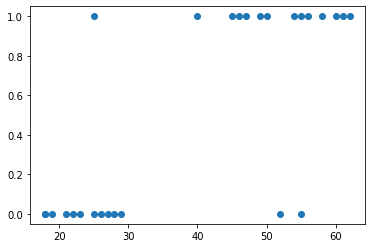

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("insurance_data.csv")
# x = np.array(df.age).reshape((-1,1)) 
# x = df.age.values.reshape((-1,1)) 
x = df[['age']]
y = df.bought_insurance 

plt.plot(x,y,'o')
plt.show()

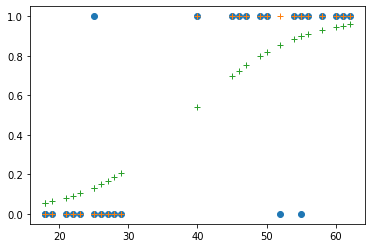

In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("insurance_data.csv")
# x = np.array(df.age).reshape((-1,1)) 
# x = df.age.values.reshape((-1,1)) 
x = df[['age']]
y = df.bought_insurance 

reg = LogisticRegression(solver='lbfgs') 
reg.fit(x,y)
y_pred = reg.predict(x)
# y_pred_prob = LogisticRegression.predict_proba(reg, x)
y_pred_prob = reg.predict_proba(x)

plt.plot(x,y,'o')
plt.plot(x,y_pred,'+')
plt.plot(x,y_pred_prob[:,1], '+')
plt.show()

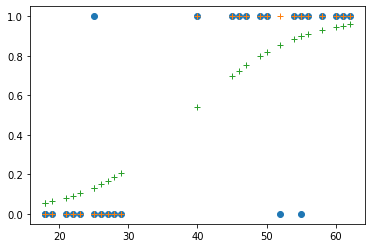

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("insurance_data.csv")
# x = np.array(df.age).reshape((-1,1)) 
# x = df.age.values.reshape((-1,1)) 
x = df[['age']]
y = df.bought_insurance 

def design_matrix(x):
    ones = np.ones((x.shape[0],1)) 
    A = np.concatenate((ones,x),axis=1)
    return A

def gradient(theta, x, y):
    A = design_matrix(x)
    p = predict_proba(theta, x).reshape((-1,1)) 
    y = np.array(y).reshape((-1,1)) 
    return A.T @ (p - y)

def gradient_descent(theta, lr, epoch, x, y):
    for i in range(epoch):
        grad = gradient(theta, x, y)
        theta = theta - lr * grad
        y_pred_prob = predict_proba(theta, x)
        #print(i, loss(y,y_pred_prob))
    return theta

def loss(y,y_pred_prob):
    p = y_pred_prob
    ve = 1e-6
    return - np.mean(y * np.log(p+ve) + (1-y) * np.log(1-p+ve))

def predict(theta, x):
    p = predict_proba(theta, x)
    decision = np.zeros((x.shape[0],))
    decision[p>0.5] = 1
    return decision.reshape((-1,1))

def predict_proba(theta, x):
    x = np.array(x) 
    A = design_matrix(x)
    z = A @ theta
    p = sigmoid(z).reshape((-1,))
    return p

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

theta = np.array([[0],[0.1]])
lr = 2e-4
epoch = 100000
x = x.values.reshape((-1,1))
y = y

theta = gradient_descent(theta, lr, epoch, x, y)
y_pred = predict(theta, x)
y_pred_prob = predict_proba(theta, x)

plt.plot(x,y,'o')
plt.plot(x,y_pred,'+')
plt.plot(x,y_pred_prob, '+')
plt.show()

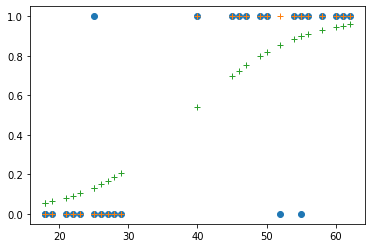

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("insurance_data.csv")
x = df[['age']]
y = df.bought_insurance 


class LR:
    
    def __init__(self, x, y, lr=2e-4, epoch=100000, theta=None):
        self.x = x.values.reshape((-1,1))
        self.y = y.values.reshape((-1,))
        self.lr = lr
        self.epoch = epoch
        
        if theta == None:
            self.theta = np.random.normal(size=(x.shape[1]+1,1))
        else:
            self.theta = theta
            
    @staticmethod
    def design_matrix(x):
        ones = np.ones((x.shape[0],1)) 
        A = np.concatenate((ones,x),axis=1)
        return A
    
    def gradient(self):
        A = self.design_matrix(self.x)
        p = self.predict_proba(self.x).reshape((-1,1)) 
        y = self.y.reshape((-1,1)) 
        return A.T @ (p - y)
    
    def train(self):
        for i in range(self.epoch):
            grad = self.gradient()
            self.theta -= self.lr * grad
            y_pred_prob = self.predict_proba(self.x)
            #print(i, self.loss())
    
    def loss(self):
        p = self.predict_proba(self.x)
        ve = 1e-6
        return - np.mean(self.y * np.log(p+ve) + (1-self.y) * np.log(1-p+ve))
    
    def predict_proba(self, x): 
        A = self.design_matrix(x)
        z = A @ self.theta
        p = self.sigmoid(z).reshape((-1,))
        return p
    
    def predict(self, x):
        p = self.predict_proba(x)
        decision = np.zeros((x.shape[0],))
        decision[p>0.5] = 1
        return decision
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    
a = LR(x, y)
a.train()
y_pred = a.predict(x)
y_pred_prob = a.predict_proba(x)

plt.plot(x,y,'o')
plt.plot(x,y_pred,'+')
plt.plot(x,y_pred_prob, '+')
plt.show()

In [13]:
import numpy as np

a = np.random.normal(size=(2,3))
print(a.reshape((-1,1)))

[[-1.66867385]
 [ 1.08803459]
 [ 0.75243986]
 [ 0.23247313]
 [ 2.00953141]
 [ 0.97751624]]
